# EEG preprocessing 

## Imports

The data will be processed using the mne library. Also there are libraries made in eegyolk in order to load the metadata, eeg data and the event markers. Those libraries need to be imported

In [1]:
import mne      # toolbox for analyzing and visualizing EEG data
import os       # using operating system dependent functionality (folders)
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
import copy     # Can Copy and Deepcopy files so original file is untouched.
from ipywidgets import IntSlider, Output
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from pathlib import Path
import glob 

import sys
sys.path.insert(0, '../eegyolk') # path to helper functions
from eegyolk import helper_functions as hf # library useful for eeg and erp data cleaning
from eegyolk import initialization_functions #library to import data
from eegyolk import epod_helper

## Load metadata and eeg files

First the different pathways for the different datasets need to be defined. There are three pathways: eeg, metadata and events. The files can be loaded using the initialization_functions library. All event markers needs to be saved in a seperate folder. If not saved already, the event markers will be saved using the initialization_function library. 

In [2]:
path_metadata = os.path.join('../epod_data_not_pushed','metadata')
path_eeg = os.path.join('../epod_data_not_pushed','not_zip')
path_eventmarkers = os.path.join('../epod_data_not_pushed','not_zip', 'event_markers')

In [3]:
# load metadata and eeg
files_metadata = ["children.txt", "cdi.txt", "parents.txt", "CODES_overview.txt"]  
children, cdi, parents, codes = initialization_functions.load_metadata(path_metadata, files_metadata)

In [4]:
#eeg, eeg_filenames = initialization_functions.generator_load_dataset(path_eeg)
#for eeg, eeg_filenames in initialization_functions.generator_load_dataset(path_eeg):
#    print(eeg_filenames)
#    break

pattern = os.path.join(path_eeg, '**/*' +'.bdf')
eeg_filepaths = glob.glob(pattern, recursive=True)
#eeg_list= os.listdir(path_eeg)
#eeg_list
eeg_filepaths

['../epod_data_not_pushed\\not_zip\\101to110\\101to110\\101\\101a\\101a.bdf',
 '../epod_data_not_pushed\\not_zip\\101to110\\101to110\\101\\101b\\101b.bdf',
 '../epod_data_not_pushed\\not_zip\\101to110\\101to110\\102\\102a\\102a.bdf',
 '../epod_data_not_pushed\\not_zip\\101to110\\101to110\\102\\102b\\102b.bdf',
 '../epod_data_not_pushed\\not_zip\\101to110\\101to110\\103\\103a\\103a.bdf',
 '../epod_data_not_pushed\\not_zip\\101to110\\101to110\\103\\103b\\103b.bdf',
 '../epod_data_not_pushed\\not_zip\\101to110\\101to110\\104\\104a\\104a.bdf',
 '../epod_data_not_pushed\\not_zip\\101to110\\101to110\\104\\104b\\104b.bdf',
 '../epod_data_not_pushed\\not_zip\\101to110\\101to110\\105\\105a\\105a.bdf',
 '../epod_data_not_pushed\\not_zip\\101to110\\101to110\\105\\105b\\105b.bdf',
 '../epod_data_not_pushed\\not_zip\\101to110\\101to110\\106\\106a\\106a.bdf',
 '../epod_data_not_pushed\\not_zip\\101to110\\101to110\\106\\106b\\106b.bdf',
 '../epod_data_not_pushed\\not_zip\\101to110\\101to110\\107\\107

In [6]:
index = 5
eeg_string = eeg_filepaths[index]
eeg= mne.io.read_raw_bdf(eeg_string,preload=True)
print("\n", eeg.info)

Extracting EDF parameters from F:\Stage\ePODIUM\ePodium\epod_data_not_pushed\not_zip\101to110\101to110\103\103b\103b.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 4294655  =      0.000 ...  2097.000 secs...

 <Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 417.0 Hz
 meas_date: 2021-06-16 10:34:04 UTC
 nchan: 41
 projs: []
 sfreq: 2048.0 Hz
>


In [7]:
path_eventmarkers2= 'love'
events_files = os.listdir(path_eventmarkers2)
if not events_files:
    initialization_functions.caller_save_event_markers(path_eventmarkers2, initialization_functions.generator_load_dataset(path_eeg))
        

In [15]:
for i in range(len(events_files)):
    events_files[i] = events_files[i].replace('.txt', '')


In [16]:
# # load events 
# events_files = os.listdir(path_eventmarkers)
# if len(events_files) == 0 or path_eventmarkers == False: # check if event markers are saved in a seperate folder
#     initialization_functions.save_event_markers(path_eventmarkers, eeg, eeg_filenames) # save event markers
    
event_markers = initialization_functions.load_event_markers(path_eventmarkers2, events_files) # load event markers
event_markers_simplified = epod_helper.group_event_markers(event_markers) # simplify events

99 Event Marker files loaded


## Data info

Choose which participant you want to view in the box below. 

In [17]:
eeg.info

<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, F7, F3, FC1, FC5, T7, C3, CP1, CP5, P7, P3, Pz, PO3, ...
 chs: 40 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 417.0 Hz
 meas_date: 2021-06-16 10:34:04 UTC
 nchan: 41
 projs: []
 sfreq: 2048.0 Hz
>

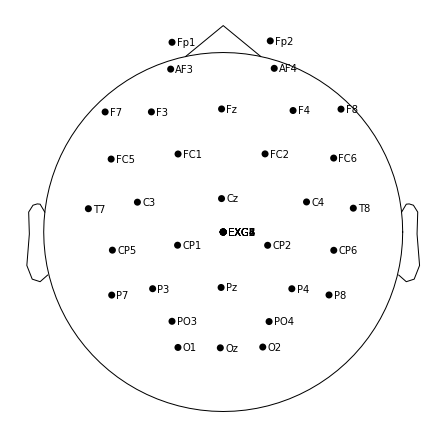

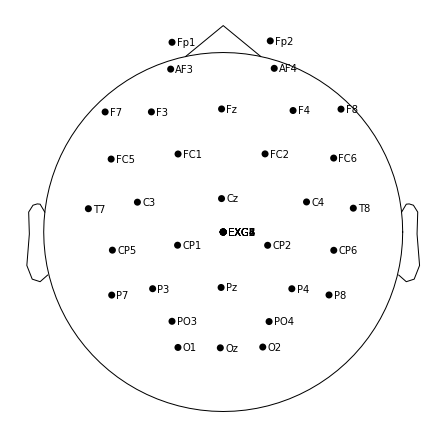

In [18]:
# plot of the used sensors
montage = mne.channels.make_standard_montage('standard_1020')
#montage.plot(kind='topomap', show_names=True)
eeg.info.set_montage(montage, on_missing='ignore')
eeg.plot_sensors(ch_type='eeg', show_names=True)

Using matplotlib as 2D backend.
Opening raw-browser...


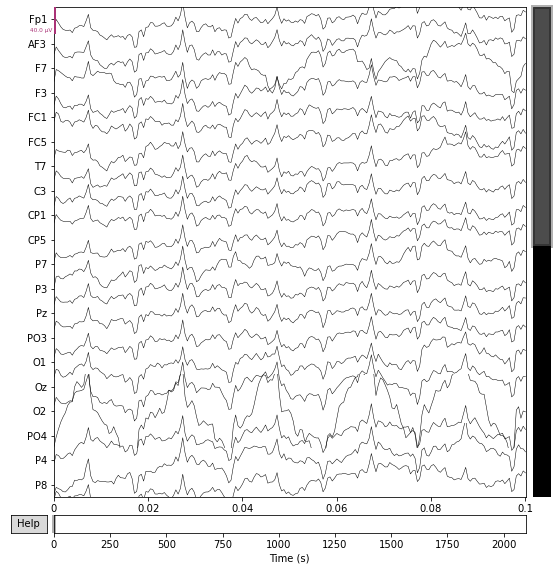

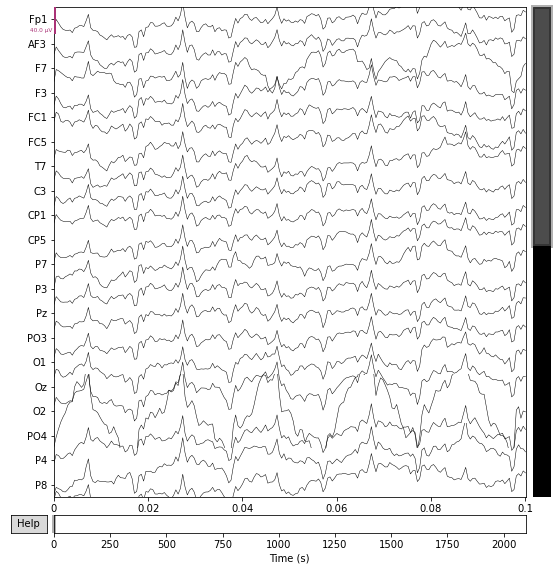

In [19]:
eeg.plot(duration=0.1)

<ipython-input-23-4685d00d042e>:2: RuntimeWarning: More events than default colors available. You should pass a list of unique colors.
  fig = mne.viz.plot_events(event_markers_simplified[1], event_id = epod_helper.event_dictionary)


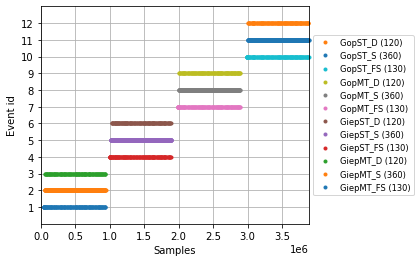

In [23]:
%matplotlib inline 
fig = mne.viz.plot_events(event_markers_simplified[1], event_id = epod_helper.event_dictionary)

## Filtering

In [ ]:
# bad channel remover
def removebadchannel(eeg):
    for i in range(len(eeg)):
        if len(eeg[i].info['bads']) != 0:
            eeg[index] = mne.pick_types(eeg[i].info, meg=False, eeg=True, exclude='bads')
    return eeg
removebadchannel(eeg)

In [24]:
lowpass = widgets.IntText(
    step=0.1,
    description='lowpass:',
    disabled=False
)

highpass = widgets.IntText(
    step=0.1,
    description='highpass:',
    disabled=False
)

widgets.VBox([lowpass,highpass])


In [25]:
# change type to integer
lowpass = int(lowpass.value)
highpass = int(highpass.value)

Bandpass filter doesn't work due to memory issues. Can be fixed with preload = True in the load_data() in helper_functions.py. However, jupyter crashes due to lack of memory when done. Needs to be fixed.

In [26]:
# bandpass filter

freqs = (60, 120, 180, 240)
cwd = str(Path.cwd()) + "\\clean_data\\"
for eeg, eeg_filenames in initialization_functions.generator_load_dataset(path_eeg):
    eeg = hf.band_pass_filter(eeg, lowpass, highpass)
    eeg = eeg.notch_filter(freqs=freqs)
    break
    

Extracting EDF parameters from F:\Stage\ePODIUM\ePodium\epod_data_not_pushed\not_zip\101to110\101to110\101\101a\101a.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3497983  =      0.000 ...  1708.000 secs...
file is read
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 6759 samples (3.300 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain 

Below a working filter, but not imported from helper_functions.py. This is a band pass filter with defined frequency. The filter is useful for limitting the bandwidth of the output signal to avoid noise. 

The data contains power line noise which disrupts the rest of the signal. The notch filter filters out the fequency of 50 Hz. Does not work because of the preload memory issue. 

## Creating epoched data

Epochs are created with joining the eeg data with a specific event. tmin and tmax are the start and stop time relative to each event. mne.Epochs automaticaly create a baseline correction.

In [ ]:
def create_epochs(eeg, event_markers_simplified):
    epochs =  []
    for i in range(len(eeg)): 
        single_epoch = mne.Epochs(eeg[i], event_markers_simplified[i], tmin=-0.3, tmax=0.7)
        epochs.append(single_epoch)
    return epochs

epochs = create_epochs(eeg, event_markers_simplified)

In [ ]:
print(epochs)

In [ ]:
event_dictionary = epod_helper.event_dictionary
event_dictionary

In [ ]:
def evoked_responses(epochs, event_dictionary):
    evoked = []
    for i in range(len(epod_helper.event_dictionary)):
        avg_epoch = epochs[i].average()
        evoked.append(avg_epoch)
    return evoked

evoked = evoked_responses(epochs, event_dictionary)
        
#evoked.plot()
#print(([key for key in epod_helper.event_dictionary.keys()][i], [value for value in epod_helper.event_dictionary.values()][i]))
        

In [ ]:
#evoked[2].plot(spatial_colors=True)
#print(([key for key in epod_helper.event_dictionary.keys()][i], [value for value in epod_helper.event_dictionary.values()][i]))

## Create pandas dataset out of epoched data

In [ ]:
epochs = epochs[0:4] # subset to test function
def create_pd_df(epochs):
    df_epochs = pd.DataFrame()

    for i in range(len(epochs)):
        df = epochs[i].to_data_frame()
        df['index'] = i
        df_epochs = df_epochs.append(df)
    return df_epochs

create_pd_df(epochs)

In [ ]:
df_epochs